# 构建自动编码器(Autoencoder) 
注意: 这篇文章的内容需要一些对Keras的理解, 这先确认你/妳己先阅读并练习过以下的连结内容:


* 在本教程中，我们将回答关于autoencoders的一些常见问题，我们将介绍以下模型的代码示例：

* 一个基于完全连接层(fully-connected layer)的简单的自动编码器
* 一个深度完全连接(deep fully-connected)的自动编码器
* 一个深度卷积(deep convolutional)自动编码器
* 图像去噪(denoising)模型

# 什么是自动编码器？

![1.jpg](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

# 构建最简单的自动编码器

In [17]:
from  keras.layers  import  Input ,  Dense 
from  keras.models  import  Model

#这是我们要进行编码表示(representation)的大小
encoding_dim  =  32  # 32浮点数->假如我们的输入是784个浮点数,那么压缩系数为: 784/32 = 24.5

#这是我们的输入的占位符(place holder) 
input_img_fc  =  Input ( shape = ( 784 ,))

# "encoded"是输入编码过后的表示(representation) 
encoded_fc  =  Dense ( encoding_dim ,  activation = 'relu' )( input_img_fc )

# "decoded"是有损失的解码结果
decoded_fc  =  Dense ( 784 ,  activation = 'sigmoid' )( encoded_fc )

#串接编码(encoded)与解码(decoded)的模型
autoencoder_fc  =  Model ( input_img_fc ,  decoded_fc )

现在让我们训练我们的自动编码器来重建MNIST数字。

首先，我们将我们的模型配置为使用每像素二进制信号(binary crossentropy)损失函数，以及Adadelta优化器：

In [18]:
#模型参数设定
autoencoder_fc . compile ( optimizer = 'adadelta' ,  loss = 'binary_crossentropy' )

#秀出模型结构
autoencoder_fc . summary ()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## 准备训练数据

In [19]:
from  keras.datasets  import  mnist 
import  numpy  as  np

( x_train ,  _ ),  ( x_test ,  _ )  =  mnist . load_data ()
x_train  =  x_train . astype ( 'float32' )  /  255. 
x_test  =  x_test . astype ( 'float32' )  /  255.

x_train  =  x_train . reshape (( len ( x_train ),  np . prod ( x_train . shape [ 1 :]))) 
x_test  =  x_test . reshape (( len ( x_test ),  np . prod ( x_test . shape [ 1 :]) ))

print ( x_train . shape ) 
print ( x_test . shape )

(60000, 784)
(10000, 784)


## 开始训练

In [20]:
autoencoder_fc.fit(x_train,x_train , 
               epochs = 50 , 
               batch_size = 256 , 
               shuffle = True , 
               validation_data = ( x_test ,  x_test ))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3565 - val_loss: 0.2726
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2669 - val_loss: 0.2577
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2469 - val_loss: 0.2336
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2252 - val_loss: 0.2145
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2089 - val_loss: 0.2007
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1971 - val_loss: 0.1908
Epoch 7/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1881 - val_loss: 0.1827
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1808 - val_loss: 0.1760
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1745 - val_loss: 0.1701
Epoch

## 进行预测

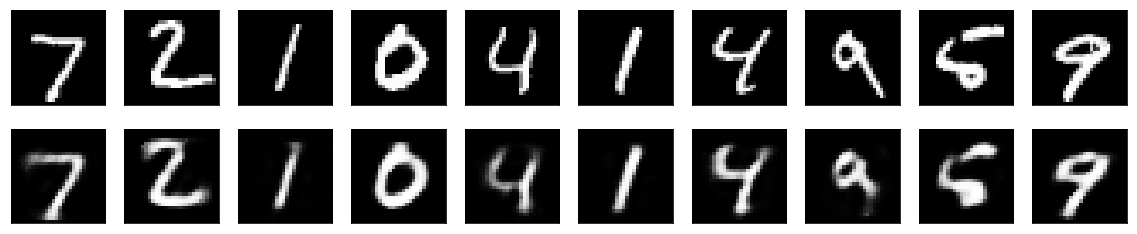

In [21]:
import  matplotlib.pyplot  as  plt

decoded_imgs_deep  =  autoencoder_fc.predict(x_test)
n  =  10  #我们想展示图像的数量
def display(n,x,labels): 
    plt.figure ( figsize = ( 20 ,  4 ))

    for  i  in  range ( n ): 
        #秀出原图像
        ax  =  plt.subplot ( 2 ,  n ,  i + 1 ) 
        plt.imshow ( x [ i ] . reshape ( 28 ,  28 )) 
        plt.gray () 
        ax.get_xaxis().set_visible ( False ) 
        ax.get_yaxis().set_visible ( False )
        #秀出重建图像
        ax  =  plt.subplot ( 2 ,  n ,  i + 1 + n ) 
        plt.imshow ( labels [ i ] . reshape ( 28 ,  28 )) 
        plt.gray () 
        ax.get_xaxis () . set_visible ( False ) 
        ax.get_yaxis () . set_visible ( False )
    plt.show ()
display(n,x_test,decoded_imgs_deep)

# 深度自动编码器

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 784)               101136    
Total para

60000/60000 [==============================] - 3s 46us/step - loss: 0.1096 - val_loss: 0.1084
Epoch 66/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1095 - val_loss: 0.1088
Epoch 67/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1091 - val_loss: 0.1066
Epoch 68/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1088 - val_loss: 0.1080
Epoch 69/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1085 - val_loss: 0.1097
Epoch 70/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1082 - val_loss: 0.1069
Epoch 71/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1080 - val_loss: 0.1061
Epoch 72/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.1076 - val_loss: 0.1075
Epoch 73/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.1074 - val_loss: 0.1088
Epoch 74/100
60000/60000 [========================

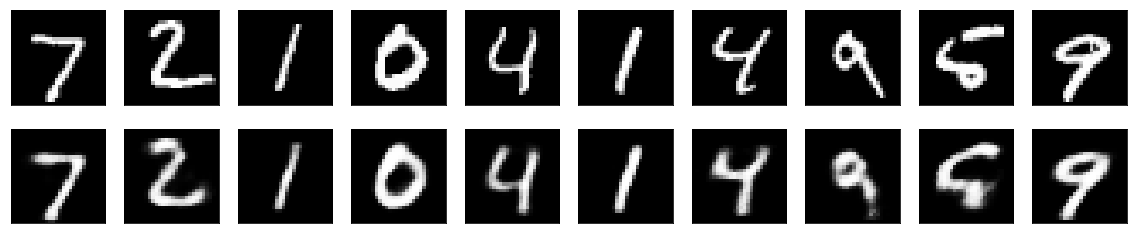

In [22]:
# 深度自动编码器
input_img_deep  =  Input ( shape = ( 784 ,))

encoded_deep  =  Dense ( 128 ,  activation = 'relu' )( input_img_deep ) 
encoded_deep  =  Dense ( 64 ,  activation = 'relu' )( encoded_deep ) 
encoded_deep  =  Dense ( 32 ,  activation = 'relu' )( encoded_deep )

decoded_deep  =  Dense ( 64 ,  activation = 'relu' )( encoded_deep ) 
decoded_deep  =  Dense ( 128 ,  activation = 'relu' )( decoded_deep ) 
decoded_deep  =  Dense ( 784 ,  activation = 'sigmoid' )( decoded_deep )

#串接编码(encoded)与解码(decoded)的模型
autoencoder_deep  =  Model ( input_img_deep ,  decoded_deep )

autoencoder_deep.summary()
#模型参数设定
autoencoder_deep . compile ( optimizer = 'adadelta' ,  loss = 'binary_crossentropy' )

#开始训练模型
autoencoder_deep . fit ( x_train ,  x_train , 
               epochs = 100 , 
               batch_size = 256 , 
               shuffle = True , 
               validation_data = ( x_test ,  x_test ))
decoded_imgs_deep  =  autoencoder_deep . predict ( x_test )
display(n,x_test,decoded_imgs_deep)

# 卷积自动编码器
由于我们的输入是图像，所以使用卷积神经网络（convnets）作为编码器和解码器是有意义的。在实际设置中，应用于图像的自动编码器始终是卷积自动编码器- 它们只是表现得更好。

我们来实现一个。编码器将包含一堆Conv2D和MaxPooling2D层（最大池用于空间向下采样down-sampling），而解码器将包含一堆Conv2D和UpSampling2D层。

In [23]:
from  keras.layers  import  Input ,  Dense ,  Conv2D ,  MaxPool2D ,  UpSampling2D 
from  keras.models  import  Model

input_img_cov  =  Input ( shape = ( 28 ,  28 ,  1 ))  #使用`channels_first`图像数据格式

x  =  Conv2D ( 16 ,  ( 3 ,  3 ),  activation = 'relu' ,  padding = 'same' )( input_img_cov ) 
x  =  MaxPool2D (( 2 ,  2 ),  padding = 'same' )( x ) 
x  =  Conv2D ( 8 ,  ( 3 ,  3 ),  activation = 'relu' ,  padding = 'same' )(x ) 
x  =  MaxPool2D (( 2 ,  2 ),  padding = 'same' )( x ) 
x  =  Conv2D ( 8 ,  ( 3 ,  3 ),  activation = 'relu' ,  padding = 'same' )( x ) 
encoded_cov  =  MaxPool2D (( 2 ,  2 ),  padding = 'same' )( x )

# 到这个节点的编码表示的结构是(4, 4, 8), 也可以想成是128-dimensional

x  =  Conv2D ( 8 ,  ( 3 ,  3 ),  activation = 'relu' ,  padding = 'same' )( encoded_cov ) 
x  =  UpSampling2D (( 2 ,  2 ))( x ) 
x  =  Conv2D ( 8 ,  ( 3 ,  3 ),  activation = 'relu' ,  padding = 'same' )( x ) 
x  = UpSampling2D (( 2 ,  2 ))( x ) 
x  =  Conv2D ( 16 ,  ( 3 ,  3 ),  activation = 'relu' )( x ) 
x  =  UpSampling2D (( 2 ,  2 ))( x ) 
decoded_cov  =  Conv2D ( 1 ,  ( 3 ,  3 ),  activation = 'sigmoid' ,  padding = 'same' )(x )

#串接编码(encoded)与解码(decoded)的模型
autoencoder_cov  =  Model ( input_img_cov ,  decoded_cov )

#模型参数设定
autoencoder_cov . compile ( optimizer = 'adadelta' ,  loss = 'binary_crossentropy' )

#秀出模型结构
autoencoder_cov . summary ()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 60s 992us/step - loss: 0.2204 - val_loss: 0.1701
Epoch 2/50
60000/60000 [==============================] - 59s 985us/step - loss: 0.1598 - val_loss: 0.1513
Epoch 3/50
60000/60000 [==============================] - 57s 957us/step - loss: 0.1437 - val_loss: 0.1364
Epoch 4/50
60000/60000 [==============================] - 59s 978us/step - loss: 0.1357 - val_loss: 0.1368
Epoch 5/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1299 - val_loss: 0.1268
Epoch 6/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1256 - val_loss: 0.1242
Epoch 7/50
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1224 - val_loss: 0.1181
Epoch 8/50
60000/60000 [==============================] - 58s 970us/step - loss: 0.1207 - val_loss: 0.1210
Epoch 9/50
60000/60000 [==============================] - 58s 

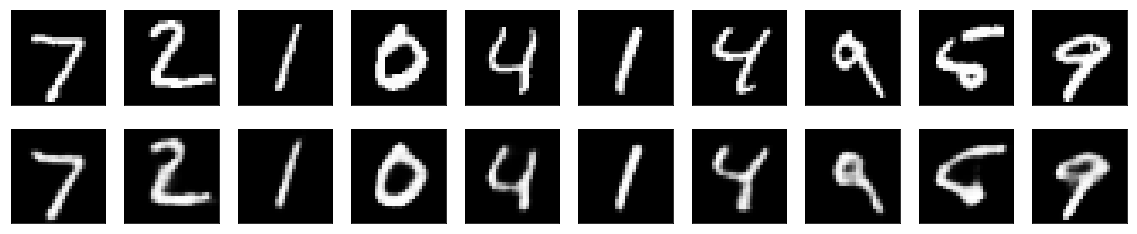

In [24]:
## 数据准备
from  keras.datasets  import  mnist 
import  numpy  as  np

( x_train ,  _ ),  ( x_test ,  _ )  =  mnist . load_data ()

x_train  =  x_train . astype ( 'float32' )  /  255. 
x_test  =  x_test . astype ( 'float32' )  /  255.

x_train  =  np . reshape ( x_train ,  ( len ( x_train ),  28 ,  28 ,  1 ))   #使用`channels_first`图像数据格式
x_test  =  np . reshape ( x_test ,  ( len ( x_test ),  28 ,  28 ,  1 ) )   #使用`channels_first`图像数据格式

print ( x_train . shape ) 
print ( x_test . shape )
#开始训练模型
autoencoder_cov . fit ( x_train ,  x_train , 
                epochs = 50 , 
                batch_size = 128 , 
                shuffle = True , 
                validation_data = ( x_test ,  x_test ))
decoded_imgs_deep  =  autoencoder_cov . predict ( x_test )
display(n,x_test,decoded_imgs_deep)